# Confusion Matrix

## Pengertian

CM: Suatu matriks yang digunakan untuk mendeskripsikan kinerja dari suatu model untuk klasifikasi (_classifier_). Suatu model untuk menentukan klasifikasi suatu obyek (misal: suatu obyek adalah anjing atau kucing, dan lain-lain) disebut dengan model untuk klasifikasi. 

Dalam kasus pembuatan model untuk klasifikasi, suatu model bisa saja dibuat dan kemudian bisa digunakan untuk mengklasifikasikan obyek. Meskipun demikian, ada hal yang perlu diperhatikan: **akurasi**. 

CM merupakan suatu matriks yang digunakan untuk **menghitung akurasi** suatu _classifier_. 

CM mempunyai ordo NxN dengan N adalah jumlah target klasifikasi. Jika target klasifikasi ada 2 (positif dan negatif), maka bisa dikatakan ordo-nya 2x2. Contoh kasus ini biasanya untuk pengenalan obyek, apakah suatu gambar adalah gambar kucing atau anjing?

```
            prediksi                        
            0       1      
          -----   -----    
       0|   TN  |   FP       
aktual    -----   -----             
       1|   FN  |   TP


1: Ya
0: Tidak
```

Matriks akan mengelompokkan nilai-nilai aktual (sesungguhnya) dan nilai-nilai prediksi kemudian angka-angka tersebut akan dimasukkan ke dalam sel-sel matriks.

Kategori | Arti
--- | ---
TP | True Positive: klasifikasi Ya, hasil Ya 
FN | False Negative: klasifikasi Tidak, hasil Ya
FP | False Positive: klasifikasi Yidak, hasil Tidak
TN | True Negative: klasifikasi Ya, hasil Tidak

Contoh: untuk kasus model menghasilkan **Ya** untuk **obyek kucing**, tetapi **ternyata bukan kucing**, maka kasus ini disebut TN. 

## Perhitungan dari CM

Dari CM yang sudah dibuat, bisa diperoleh beberapa hal:

1. **AKurasi**: seberapa sering model klasifikasi benar memprediksi? Rumus: (TP+TN)/total 
2. **Misclassification Rate** atau **error rate**: seberapa sering salah? Rumus: (FP+FN)/total atau 1 - akurasi. 
3. **True Positive Rate** atau **Sensitivitas** atau **Recall**: Saat seharusnya "Ya", berapa sering model memprediksi "Ya"? Rumus: TP / (TP + FP). 
4. **False Positive Rate**: Saat seharusnya "Tidak", berapa sering model memprediksi "Ya"? Rumus: FP / (TN + FN)
5. **True Negative Rate** atau **Specificity**: Saat seharusnya "Tidak", seberapa sering model memprediksi "Tidak"? Rumus: TN / (TN + FN).
6. **Presisi**: saat memprefikasi "Ya", seberapa sering model tersebut benar? Rumus: TP / (FP + TP) 7. **Prevalence**: seberapa sering kondisi "Ya" benar-benar muncul pada sampel? Rumus: (FN + TP) / total

## Tentang Kasus

Kasus diambil dan diolah dari https://datatofish.com/confusion-matrix-python/ dengan penyelesaian menggunakan **scikit-learn**.

y_actual | y_predicted
--- | ---
1 | 1
0 | 1
0 | 0
1 | 1
0 | 0
1 | 1
0 | 1
0 | 0
1 | 1
0 | 0
1 | 0
0 | 0

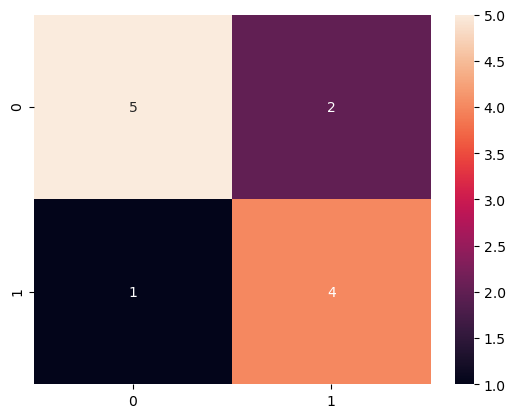

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

y_actual = [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
y_predicted = [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]

cm = confusion_matrix(y_actual, y_predicted)

sn.heatmap(cm, annot=True)
plt.show()

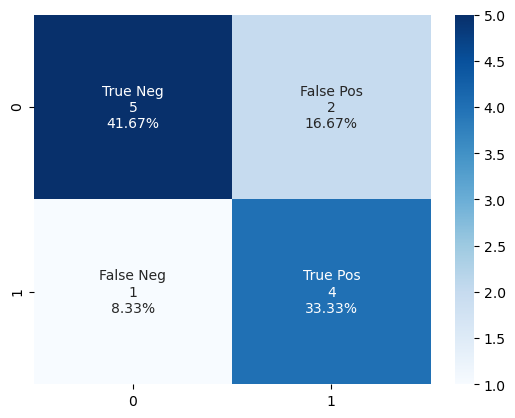

Presisi:  0.6666666666666666
Recall:  0.8
Akurasi:  0.75


In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score
# lihat semua metrics di: 
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

y_actual = [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
y_predicted = [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]

cm = confusion_matrix(y_actual, y_predicted)

prec = precision_score(y_actual, y_predicted)
rec = recall_score(y_actual, y_predicted)
acc = accuracy_score(y_actual, y_predicted)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm, annot=labels, fmt="", cmap="Blues")
plt.show()

print("Presisi: ", prec)
print("Recall: ", rec)
print("Akurasi: ", acc)